# Data Processing Approach for Portfolio Project

## Project Title: Customer Product Recommendation System

## Student Name: Larissa Bizimungu

---

### 1. **Data Sources and Aggregation:**


### - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)


**The sources to the data on Customers Product Recommendation System stems a big range of sources from online stores, to reaserch papers,**  
**and among those sources we have:**  

**- Amazon Customers Review Dataset**  
**- Alibaba/Taobao User Behavior Dataset**  
**- data.world datasets**  
**- UCI Machine Learning Repository**  
**- Harvard Dataverse**  
**- Web scraping (with proper permissions) of product review websites, etc**  
     
#### Links: Below is a link to a page with multiple datasets from Amazon based on different products such as beuty products, books, cds, ect  

https://amazon-reviews-2023.github.io/  

#### Links: below is another link to multiple datasets on products review from World.dat, a collection of a wide range of datasets across various interests  

https://data.world/search?context=community&q=&type=resources  
  
*I ended up using two datasets on Books review*  
  
        
### - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.  
  

For a comprehensive customer product recommendation system, data aggregation from multiple sources is indeed necessary. Here's why:  

**1. Diverse product range:**   
Different sources may cover various product categories. For example, Amazon datasets might have a wide range of products, while a specific dataset from data.world might focus on books. Aggregating these provides a more comprehensive product catalog.  

**2. User behavior insights:**   
Combining data from sources like Amazon Customer Reviews and Alibaba/Taobao User Behavior Dataset can provide a more holistic view of user preferences across different platforms and cultures.  
  
**3. Cross-validation:**  
Using multiple sources allows for cross-validation of trends and patterns, increasing the reliability of your analysis.
Overcoming data limitations: Single sources may have limitations in terms of data quality, completeness, or recency. Aggregating from multiple sources can help fill these gaps.  
  
**4. Richer feature set:**  
Different datasets might offer unique features. For instance, Amazon might provide detailed product attributes, while web-scraped data could offer real-time pricing information.  

**5. Temporal aspects:**  
Some datasets might cover different time periods. Aggregating these can provide insights into changing customer preferences over time.
  
**6. Demographic diversity:**  
Different sources might represent various demographic groups, leading to a more inclusive recommendation system.

**7. Reducing bias:**   
Relying on a single source might introduce biases specific to that platform. Using multiple sources can help in creating a more balanced dataset.

**8. Enhanced cold start problem solving:**   
For new users or products, having data from multiple sources increases the chances of finding relevant information for initial recommendations.

**9. Improved personalization:**    
With a broader dataset, you can create more refined user profiles and offer more personalized recommendations.

In [11]:
#The necessary codes

import pandas as pd

# Load the datasets
df1 = pd.read_csv('datasets/dataset1.csv')
df2 = pd.read_csv('datasets/dataset2.csv', encoding='latin1')

# Inspect the data
print("Dataset1")
df1.head()

Dataset1


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Dataset2

In [12]:
print("Dataset2")
df2.head()

Dataset2


,rank,bookId,title,series,numberOfSeries,author,authorLastFirst,description,language,genres,...,edition,pages,publisher,publishedYear,firstPublishYear,awards,rating,numRatings,ISBN,ISBN13
0,1,2767052,"The Hunger Games (The Hunger Games, #1)",The Hunger Games,#1,Suzanne Collins,"Collins, Suzanne",In the ruins of a place once known as North Am...,English,"Young Adult, Fiction, Dystopia, Fantasy, Scien...",...,First Edition,374,Scholastic Press,2008,2008,Locus Award Nominee for Best Young Adult Book ...,4.33,6376780.0,0439023483,9.780439e+12
1,2,48855,The Diary of a Young Girl,NaN,NaN,"Anne Frank, Eleanor Roosevelt (Introduction), ...","Frank, Anne",Discovered in the attic in which she spent the...,English,"Nonfiction, Classics, History, Biography, Memo...",...,US / CAN Edition,283,Bantam,1993,1947,Luisterboek Award Nominee (2008),4.15,2741134.0,NaN,NaN
2,3,1934,Little Women,Little Women,#1,Louisa May Alcott,"Alcott, Louisa May","Generations of readers young and old, male and...",English,"Classics, Fiction, Historical Fiction, Young A...",...,NaN,449,Signet Classics,2004,1880,NaN,4.09,1681583.0,0451529308,9.780452e+12
3,4,11870085,The Fault in Our Stars,NaN,NaN,John Green,"Green, John",Despite the tumor-shrinking medical miracle th...,English,"Young Adult, Romance, Fiction, Contemporary, R...",...,NaN,313,Dutton Books,2012,2012,"Georgia Peach Book Award (2013), Buxtehuder Bu...",4.21,3550714.0,NaN,NaN
4,5,8127,Anne of Green Gables,Anne of Green Gables,#1,L.M. Montgomery,"Montgomery, L.M.",As soon as Anne Shirley arrives at the snug wh...,English,"Classics, Fiction, Young Adult, Childrens, His...",...,NaN,320,Signet Book,2003,1908,NaN,4.26,727685.0,0451528824,9.780452e+12


In [16]:
# Merge the datasets on common columns (assuming 'Name' in df1 is the same as 'title' in df2, and 'Author' in df1 is the same as 'author' in df2)
df_merged = pd.merge(df1, df2, left_on=['Name', 'Author'], right_on=['title', 'author'], how='inner')

# Drop unnecessary columns to avoid repitition
df_merged = df_merged.drop(columns=['title', 'author', 'authorLastFirst', 'ISBN', 'ISBN13'])

df_merged.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,rank,bookId,series,...,coverImg,bookFormat,edition,pages,publisher,publishedYear,firstPublishYear,awards,rating,numRatings
0,Divergent,Veronica Roth,4.6,27098,15,2013,Fiction,11,13335037,Divergent,...,https://i.gr-assets.com/images/S/compressed.ph...,Paperback,NaN,487,Katherine Tegen Books,2012,2011,"Georgia Peach Book Award (2012), South Carolin...",4.19,2906258.0
1,Divergent,Veronica Roth,4.6,27098,15,2014,Fiction,11,13335037,Divergent,...,https://i.gr-assets.com/images/S/compressed.ph...,Paperback,NaN,487,Katherine Tegen Books,2012,2011,"Georgia Peach Book Award (2012), South Carolin...",4.19,2906258.0
2,Looking for Alaska,John Green,4.5,8491,7,2014,Fiction,14,99561,NaN,...,https://i.gr-assets.com/images/S/compressed.ph...,Paperback,NaN,221,Speak,2006,2005,Los Angeles Times Book Prize Nominee for Young...,4.02,1113222.0
3,The Book Thief,Markus Zusak,4.6,23148,6,2013,Fiction,16,19063,NaN,...,https://i.gr-assets.com/images/S/compressed.ph...,Hardcover,First American Edition,552,Alfred A. Knopf,2006,2005,National Jewish Book Award for Childrens and Y...,4.37,1834276.0
4,The Book Thief,Markus Zusak,4.6,23148,6,2014,Fiction,16,19063,NaN,...,https://i.gr-assets.com/images/S/compressed.ph...,Hardcover,First American Edition,552,Alfred A. Knopf,2006,2005,National Jewish Book Award for Childrens and Y...,4.37,1834276.0




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 Current Format of the Data:

   **The data is split across two datasets with the following structures:**

   **Dataset 1:**

   Columns: Name, Author, User Rating, Reviews, Price, Year, Genre
   
   **Dataset 2:*

   Columns: rank, bookId, title, series, numberOfSeries, author, authorLastFirst, description, language, genres, characters, setting, coverImg, bookFormat, edition, pages, publisher, publishedYear, firstPublishYear, awards, rating, numRatings, ISBN, ISBN13
   Planned Transformation:

   **1. Merge the datasets:** Combine both datasets on common columns (Name from dataset 1 with title from dataset 2, and Author from dataset 1 with author from dataset 2).  

   **2. Standardize Column Names:** Rename columns for consistency.  

   **3. Handle Missing Values:** Fill or drop missing values as appropriate.  

   **4. Encode Categorical Variables:** Convert categorical variables into a numeric format suitable for modeling.  

   **5. Normalize Numerical Features:** Scale numerical features to a standard range.  

   **6. Feature Engineering:** Create new features that might be useful for modeling (e.g., length of the book description).  
      

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
  **Insert code for data exploration below**  
   **Let's us first answere the features included in the dataset:**

**Features Included in the Dataset:**  

After merging and transforming the datasets, the features include:  

Name, User Rating, Reviews, Price, Year, Genre, rank, bookId, series, numberOfSeries, description, language, genres, characters, setting, coverImg, bookFormat, edition, pages, publisher, publishedYear, firstPublishYear, awards, rating, numRatings, description_length, and the one-hot encoded features for Genre, language, bookFormat, and genres.  

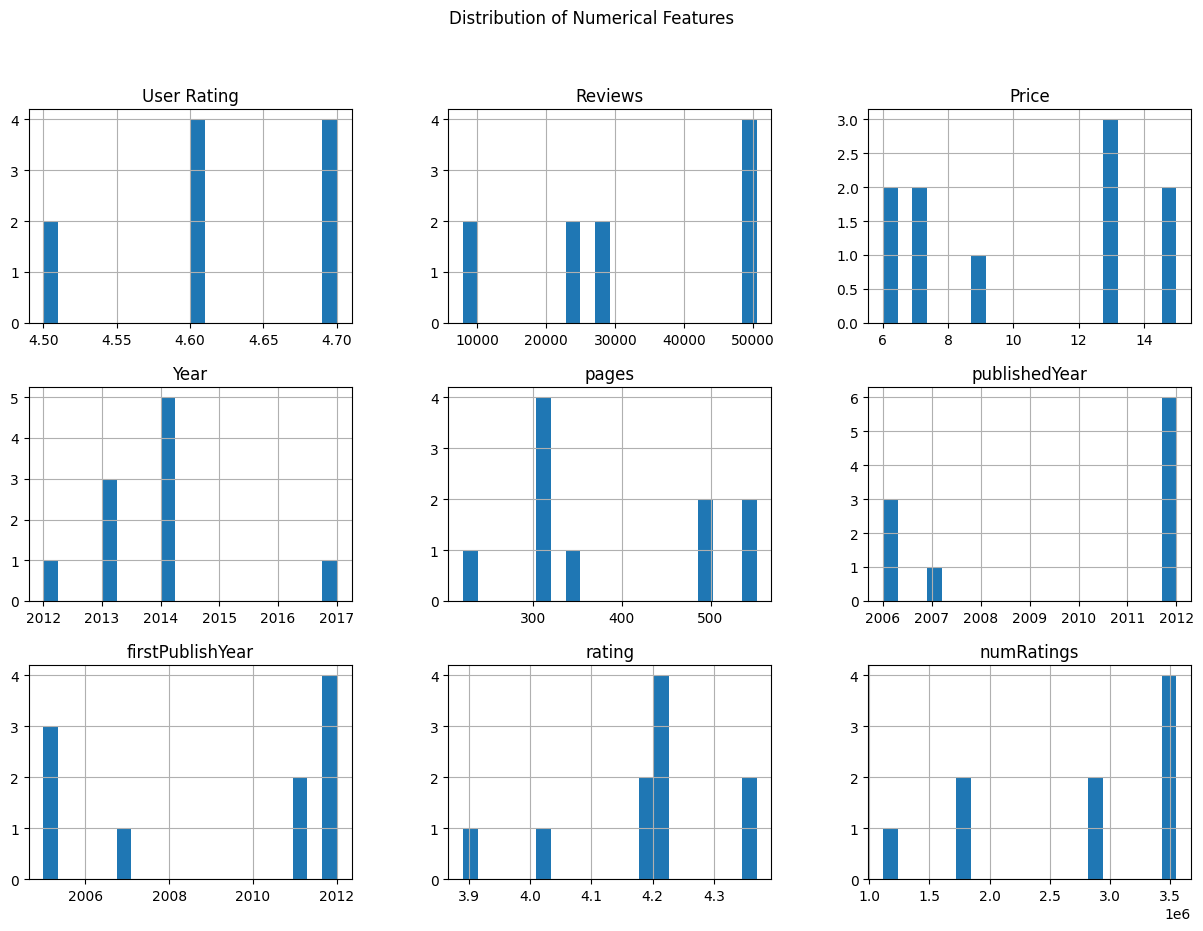

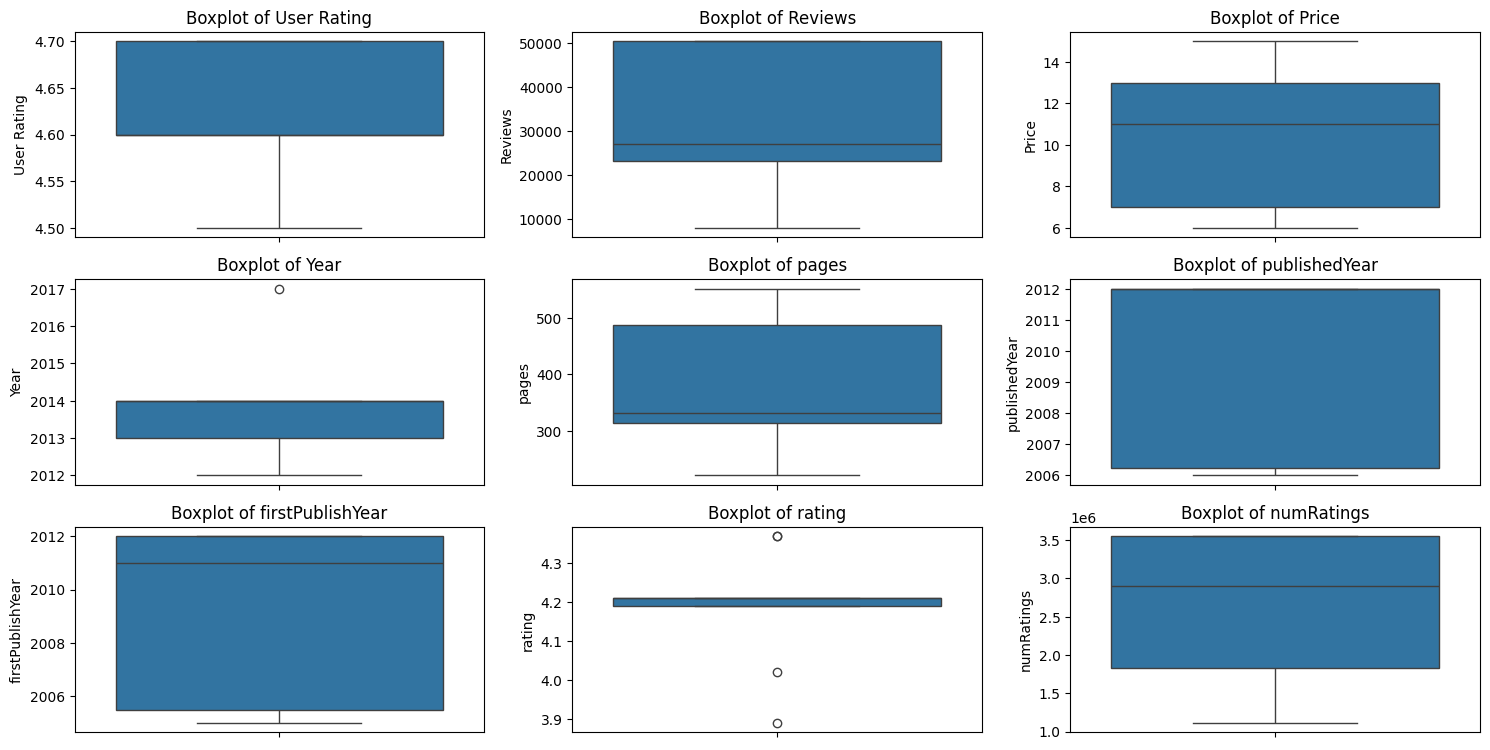

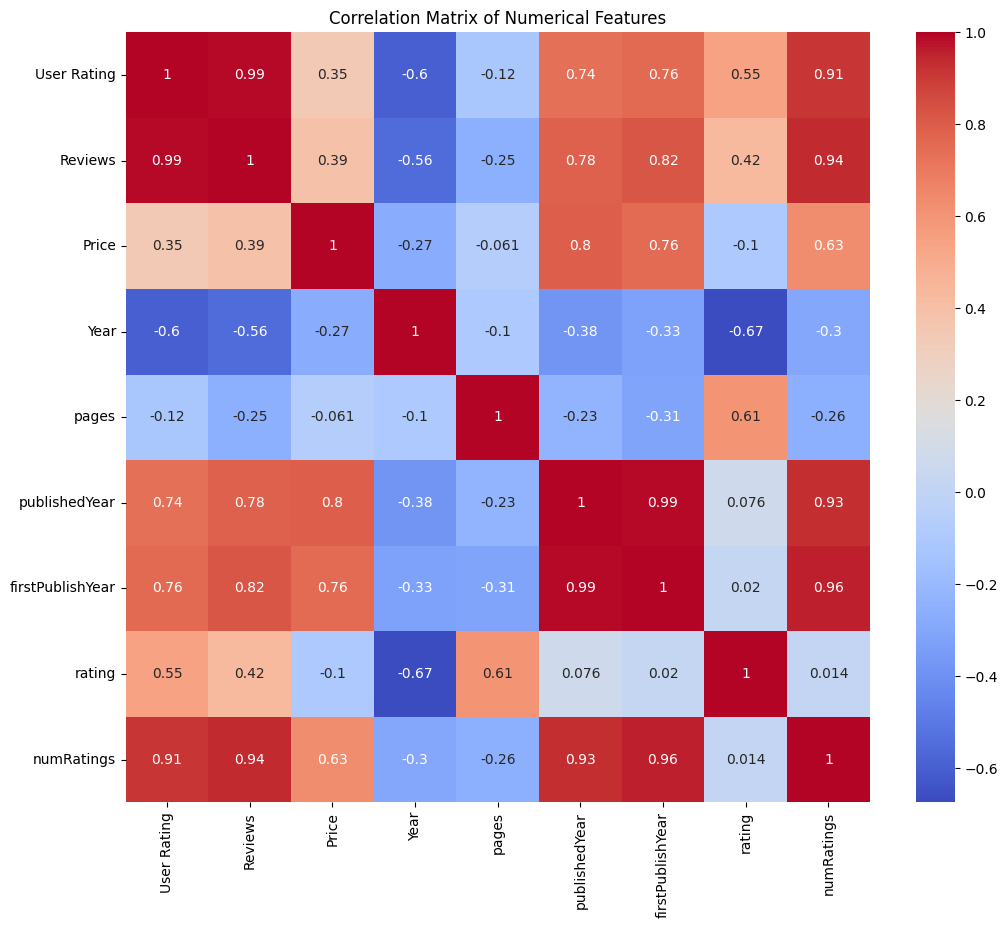

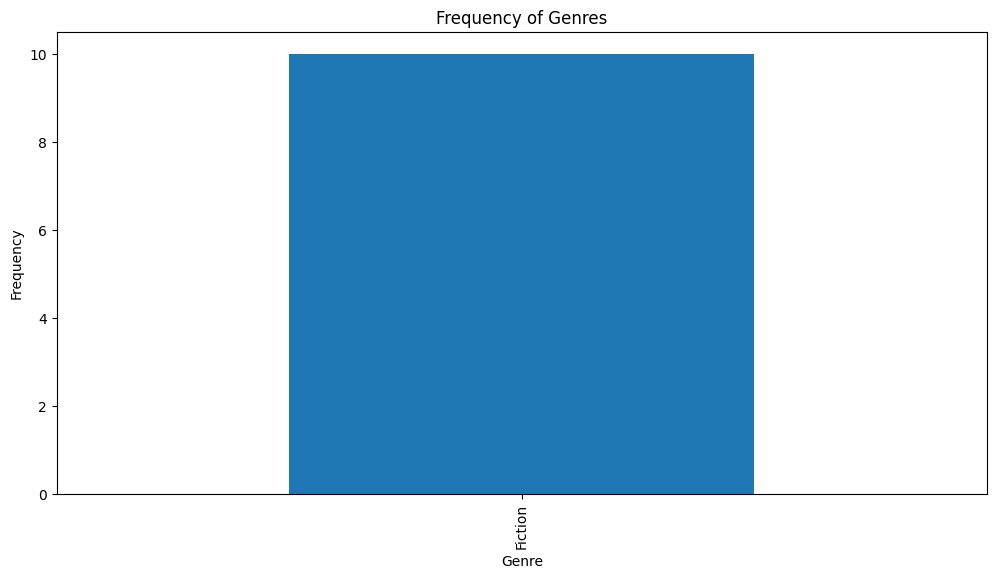

Summary statistics of numerical features:
       User Rating       Reviews      Price         Year       pages  \
count    10.000000     10.000000  10.000000    10.000000   10.000000   
mean      4.620000  31884.300000  10.400000  2013.800000  390.300000   
std       0.078881  17329.871937   3.747592     1.316561  117.863433   
min       4.500000   7932.000000   6.000000  2012.000000  221.000000   
25%       4.600000  23148.000000   7.000000  2013.000000  313.000000   
50%       4.600000  27098.000000  11.000000  2014.000000  332.500000   
75%       4.700000  50482.000000  13.000000  2014.000000  487.000000   
max       4.700000  50482.000000  15.000000  2017.000000  552.000000   

       publishedYear  firstPublishYear     rating    numRatings  
count      10.000000         10.000000  10.000000  9.000000e+00  
mean     2009.700000       2009.200000   4.187000  2.755238e+06  
std         2.983287          3.259175   0.143453  9.333609e+05  
min      2006.000000       2005.000000   3.89

In [21]:
#Include plots for EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of numerical features
numerical_features = ['User Rating', 'Reviews', 'Price', 'Year', 'pages', 'publishedYear', 'firstPublishYear', 'rating', 'numRatings']

# Histograms
df_merged[numerical_features].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(df_merged[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df_merged[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Categorical feature analysis (example for 'Genre')
plt.figure(figsize=(12, 6))
df_merged['Genre'].value_counts().plot(kind='bar')
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print("Summary statistics of numerical features:")
print(df_merged[numerical_features].describe())




4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   **Your answer for Hypothesis Testing goes here **

5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   **Insert code for Handling Sparse/Dense Data and Outliers below**

6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **Your answer for Hypothesis Testing goes here **



8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [**insert text for preprocessing steps**]


In [ ]:
#print out relevant features


10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.